In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples, chains, mcsamples

import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/getdist/plots.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


In [2]:
dir_name = '/home/isidro/SimpleMC/chains/'
#/home/isidro/SimpleMC/SimpleMC/chains/mcmc_SN+HD+BBAO+Planck.txt
roots = ['LCDM_phy_HD_nested_dynesty_multi', #original
#          'LCDM_phy_HD_nested_dynesty_multi_new_new_new_new',  #31
         'LCDM_phy_HD_nested_dynesty_multi_new', #50
         'LCDM_phy_HD_nested_dynesty_multi_new_new'] #100

In [3]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1})

<Figure size 720x648 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1149: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  weights = None if self.chains[0].weights is None else np.hstack((chain.weights for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1150: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  loglikes = None if self.chains[0].loglikes is None else np.hstack((chain.loglikes for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1151: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of 

/home/isidro/SimpleMC/chains/LCDM_phy_HD_nested_dynesty_multi_1.txt
Removed 0.1 as burn in
/home/isidro/SimpleMC/chains/LCDM_phy_HD_nested_dynesty_multi_new_1.txt
Removed 0.1 as burn in


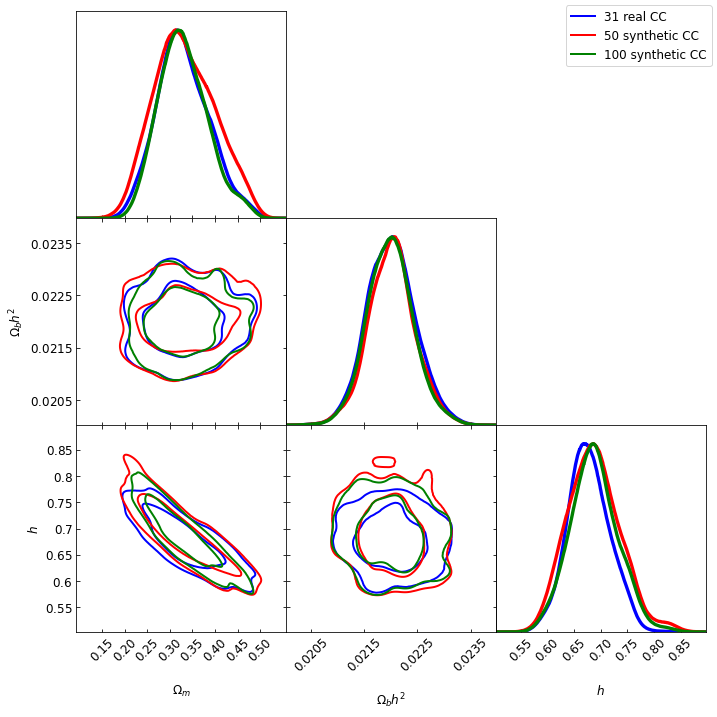

In [4]:


g.settings.axes_fontsize = 12
g.settings.lab_fontsize = 12
#g.settings.alpha_filled_add = 0.5
g.settings.legend_fontsize = 12
g.settings.x_label_rotation= 45
g.settings.scaling_factor = 1.0
# #g.settings.alpha_filled_add = 0.5
#g.settings.axes_fontsize = 10
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'


g.triangle_plot(roots, ['Om', 'Obh2', 'h'], 
                diag1d_kwargs={'colors':['blue', 'red', 'green', 'black']},
                colors=['blue', 'red', 'green', 'black'],
                legend_labels=['31 real CC', 
#                                '31 synthetic CC',
                               '50 synthetic CC', 
                               '100 synthetic CC'])
#                 filled = False) 
#                 normalized=False, shaded=False)
        

# plt.savefig('LCDHz3sets50100.png', dpi=300)
plt.show()

In [5]:
dir_name = '/home/isidro/SimpleMC/chains/'
#/home/isidro/SimpleMC/SimpleMC/chains/mcmc_SN+HD+BBAO+Planck.txt
root1 = dir_name+'LCDM_phy_HD_nested_dynesty_multi'
root2 = dir_name+'LCDM_phy_HD_nested_dynesty_multi_new'

In [6]:
import numpy
import matplotlib.pyplot as plt
from fgivenx import plot_contours, samples_from_getdist_chains

In [7]:
def Hzfunc(z, theta1):
    Omega_m, h = theta1
    Hz = 100*h*(Omega_m*(1+z)**3 +(1-Omega_m))**0.5
    return Hz

In [8]:
samples, weights = samples_from_getdist_chains(['Om', 'h'], root1)
samples2, weights2 = samples_from_getdist_chains(['Om', 'h'], root2)

/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1149: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  weights = None if self.chains[0].weights is None else np.hstack((chain.weights for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1150: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  loglikes = None if self.chains[0].loglikes is None else np.hstack((chain.loglikes for chain in self.chains))
/usr/local/lib/python3.6/dist-packages/getdist/chains.py:1151: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of 

/home/isidro/SimpleMC/chains/LCDM_phy_HD_nested_dynesty_multi_1.txt
Removed no burn in
/home/isidro/SimpleMC/chains/LCDM_phy_HD_nested_dynesty_multi_new_1.txt
Removed no burn in


NameError: name 'Hlcdm' is not defined

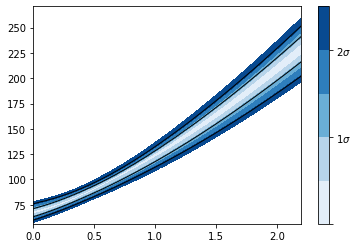

In [9]:
z = np.linspace(0, 2.2, 100)
cbar = plot_contours(Hzfunc, z, samples, weights=weights,
                             contour_line_levels=[1,2], linewidths=1,
                             colors=plt.get_cmap('Blues'))


cbar = plt.colorbar(cbar, ticks=[0, 1, 2, 3])
        #cbar.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$', r'$3\sigma$'])
cbar.set_ticklabels(['', '$1\sigma$', '$2\sigma$'])

        # plt.xscale('log')

plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='tab:orange', linewidth=5)
plt.plot(z, Hlcdm(z, H0=64.4), label='$\Lambda CDM$ $H_0 = 64.4$', c='y', linewidth=5)
# plt.errorbar(scaler.inverse_transform(X), y[:,0], y[:,1], fmt='r.', 
#              markersize=10, label='Observations')
# plt.errorbar(r, pred_random[:,0], pred_random[:,1], fmt='r.', markersize=1, label='Synthetic data with errors', alpha=0.005, )

plt.tight_layout()
# plt.grid()
plt.legend(loc="upper left")
plt.ylabel('H(z)')
plt.xlabel('z')


In [ ]:
# cbar = plot_contours(Hzfunc, z, samples, weights=weights,
#                              contour_line_levels=[1,2], linewidths=1,
#                              colors=plt.get_cmap('Blues'))

cbar2 = plot_contours(Hzfunc, z, samples2, weights=weights2,
                             contour_line_levels=[1,2], linewidths=1,
                             colors=plt.get_cmap('Blues'), 
                        rasterize_contours=True, smooth=0.1) 

cbar2 = plt.colorbar(cbar2, ticks=[0, 1, 2, 3])
        #cbar.set_ticklabels(['', r'$1\sigma$', r'$2\sigma$', r'$3\sigma$'])
cbar2.set_ticklabels(['', '$1\sigma$', '$2\sigma$'])
        # plt.xscale('log')

plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='tab:orange', linewidth=5)
plt.plot(z, Hlcdm(z, H0=64.4), label='$\Lambda CDM$ $H_0 = 64.4$', c='y', linewidth=5)
# plt.errorbar(r_red[:30], pred_red[:30,0], pred_red[:30,1], fmt='k.', 
#              markersize=10, label='Synthetic observations')
# # plt.errorbar(r, pred_random[:,0], pred_random[:,1], fmt='r.', markersize=1, label='Synthetic data with errors', alpha=0.005, )

plt.tight_layout()
# plt.grid()
plt.legend(loc="upper left")
plt.ylabel('H(z)')
plt.xlabel('z')
